### Bagging (Bootstrap aggregation)


Bootstrap aggregation (also known as bagging) was proposed by Leo Breiman in 1994, which is model aggregation technique to reduce model variance. The training data is splited into multiple samples with replacement called as boostrap samples. Bootstrap sample size will be same as original sample size, with 3/4th of the original values and replacement result in repetition of values.

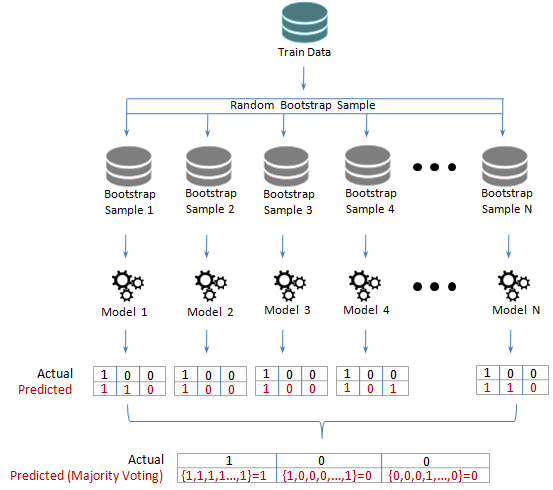

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import Image
Image(filename='../Chapter 4 Figures/Bagging.png', width=500)

In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# read the data in
df = pd.read_csv("Data/Diabetes.csv")

X = df.iloc[:,:8].values     # independent variables
y = df['class'].values       # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019)
num_trees = 100

# Dection Tree with 5 fold cross validation
clf_DT = DecisionTreeClassifier(random_state=2017).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))

# Using Bagging Lets build 100 decision tree models and average/majority vote prediction
clf_DT_Bag = BaggingClassifier(base_estimator=clf_DT, n_estimators=num_trees, random_state=2019).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_DT_Bag, X_train, y_train, cv=kfold)
print ("\nDecision Tree (Bagging) - Train : ", results.mean())
print ("Decision Tree (Bagging) - Test : ", metrics.accuracy_score(clf_DT_Bag.predict(X_test), y_test))

Decision Tree (stand alone) - Train :  0.6742199894235854
Decision Tree (stand alone) - Test :  0.6428571428571429

Decision Tree (Bagging) - Train :  0.7460074034902167
Decision Tree (Bagging) - Test :  0.8051948051948052


### Feature Importance

Decision tree model has an attribute to show important features which is based on the gini or entropy information gain

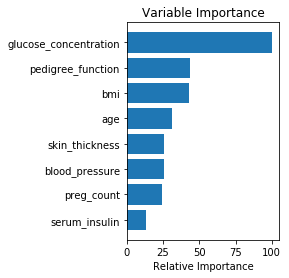

In [3]:
feature_importance = clf_DT.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Random Forest

A subset of observations and a subset of vairables are randomly picked to build multiple independent tree based models. The trees are more un-correlated as only a subset of variables are used during the split of the tree, rather than greedily choosing the best split point in the construction of the tree.

In [4]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100

X = df.iloc[:,:8].values     # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019)

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

print ("\nRandom Forest - Train : ", results.mean())
print ("Random Forest - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))


Random Forest - Train :  0.7379693283976732
Random Forest - Test :  0.8051948051948052


### Extremely Randomized Trees

This algorithm is an effort to introduce more randomness to the bagging process. Tree splits are chosen completely at random from the range of values in the sample at each split which allows to reduce the variance of the model further, however at the cost of slight increase in bias.

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

num_trees = 100

X = df.iloc[:,:8].values     # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019)

clf_ET = ExtraTreesClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_ET, X_train, y_train, cv=kfold)

print ("\nExtraTree - Train : ", results.mean())
print ("ExtraTree - Test : ", metrics.accuracy_score(clf_ET.predict(X_test), y_test))


ExtraTree - Train :  0.7410893707033315
ExtraTree - Test :  0.7987012987012987


### How does the decision boudary look?

Let's perform PCA and consider only two component for easy plotting.

Decision Tree (stand alone) - Train :  0.5781332628239026
Decision Tree (stand alone) - Test :  0.6688311688311688

Decision Tree (Bagging) - Train :  0.6319936541512428
Decision Tree (Bagging) - Test :  0.7467532467532467

Random Forest - Train :  0.6418297197250132
Random Forest  - Test :  0.7662337662337663


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



ExtraTree - Train :  0.6205446853516658
ExtraTree - Test :  0.7402597402597403


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

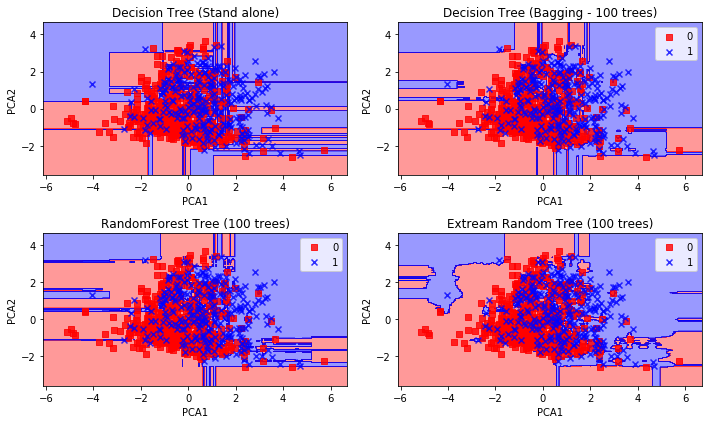

In [6]:
from matplotlib import cm

# PCA
X = PCA(n_components=2).fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

num_folds = 5
seed = 2019

kfold = model_selection.StratifiedKFold(n_splits=num_folds, random_state=seed)
num_trees = 100

# Dection Tree with 5 fold cross validation
clf_DT = DecisionTreeClassifier(random_state=seed).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))

# Using Bagging Lets build 100 decision tree models and average/majority vote prediction
clf_DT_Bag = BaggingClassifier(base_estimator=clf_DT, n_estimators=num_trees, random_state=seed).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_DT_Bag, X_train, y_train, cv=kfold)
print ("\nDecision Tree (Bagging) - Train : ", results.mean())
print ("Decision Tree (Bagging) - Test : ", metrics.accuracy_score(clf_DT_Bag.predict(X_test), y_test))

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

print ("\nRandom Forest - Train : ", results.mean())
print ("Random Forest  - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

clf_ET = ExtraTreesClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_ET, X_train, y_train, cv=kfold)

print ("\nExtraTree - Train : ", results.mean())
print ("ExtraTree - Test : ", metrics.accuracy_score(clf_ET.predict(X_test), y_test))

def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Create a colormap for red, green and blue
    cmap = ListedColormap(colors[:len(np.unique(y))])
 

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Plot the decision boundary
plt.figure(figsize=(10,6))
plt.subplot(221)
plot_decision_regions(X, y, clf_DT)
plt.title('Decision Tree (Stand alone)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(222)
plot_decision_regions(X, y, clf_DT_Bag)
plt.title('Decision Tree (Bagging - 100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')

plt.subplot(223)
plot_decision_regions(X, y, clf_RF)
plt.title('RandomForest Tree (100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')

plt.subplot(224)
plot_decision_regions(X, y, clf_ET)
plt.title('Extream Random Tree (100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.tight_layout()